## N차 과제 - API Scrapping_Reddit

- 주제: API를 활용한 데이터 불러오기 및 분석
- 데이터: 커뮤니티 텍스트 데이터(API 활용)
- 사용 라이브러리: praw, wordcloud, seaborn, nltk

### 1. 라이브러리 및 API 설정

1.1 미국 최대 커뮤니티 중 하나인 레딧(Reddit)에서 데이터를 불러오기 위해 praw 라이브러리를 install 해야 합니다.

1.2 라이브러리 설정

In [ ]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re

1.3 자연어처리를 위해 사용할 nltk 패키지를 다운로드하겠습니다(NLP 과제가 아니므로 자세히 살펴보지는 않겠습니다).

궁금하신 분들을 위해!
https://datascienceschool.net/03%20machine%20learning/03.01.01%20NLTK%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KimDongyoung\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KimDongyoung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\KimDongyoung\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

1.4 API 인증을 받겠습니다. 절차의 경우 추가로 첨부한 자료를 참고해주세요.
### **과제를 제출할 때는 본 항목의 API 키들은 모두 지우고 제출해주세요! 공유되면 안 됩니다.**

In [ ]:
#Reddit API 인증
reddit = praw.Reddit(
    client_id='Dg2PyiFlkR-LCZb3utPMdA',
    client_secret='viGweePliBv-Feaan4NIFCZNEYIEFQ',
    user_agent='bumbkie'
)

### 2. 데이터 수집 및 분석

2.1 본격적으로 API를 활용해 데이터를 불러오겠습니다. 먼저 subreddit을 'stocks'로 설정하고 엔비디아 주식에 대한 게시글을 가져오겠습니다.

In [ ]:
subreddit_name = 'stocks'
search_query = 'NVIDIA OR NVDA'
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.search(search_query, limit=300, sort='top')


2.2 가져온 데이터를 제목과 내용으로 분리된 데이터프레임으로 변환하세요.

In [ ]:
titles = []
contents = []

# top_posts에서 각 게시글의 제목과 내용을 추출
for post in top_posts:
    titles.append(post.title)
    contents.append(post.selftext)

df = pd.DataFrame({
    '제목': titles,
    '내용': contents
})


In [ ]:
df.to_csv('C:/Users/KimDongyoung/Desktop/my_git/mygit/DAT/24-2/개인과제/data/reddit.csv', index=False)

2.3 가져온 데이터를 토큰화, 불용어 제거 등 분석에 활용하기 위한 전처리를 진행하세요.

In [ ]:
df

,제목,내용
0,A note to young investors (or new investors),As the Fed caused a bit of a ripple in the mar...
1,To all of you who are red this year while the ...,Lately I keep hearing the same old narrative f...
2,Pelosi's husband buying over $1 million of com...,[Full Article](https://www.msn.com/en-us/tv/ne...
3,Beware of what AMC shorts are holding!,I understand that most people in this thread i...
4,Blackberry -- A Dormant Giant,###**Abbreviation Index:**\n\nBB -- Blackberry...
...,...,...
230,"Here is a Market Recap for today Thursday, Nov...","**PsychoMarket Recap - Thursday, November 18, ..."
231,TSMC sales grow 45% in July on strong AI chip ...,(Bloomberg) -- Taiwan Semiconductor Manufactur...
232,"META Still The Cheapest of The Magnificent 7, ...",Quick glance at some of the numbers for META. ...
233,Made 30% since I started trading 7 months ago ...,"Hello folks, \n\nI am a 24 year old who starte..."


In [ ]:
# 결측값 처리: 결측값을 빈 문자열로 대체
df['제목'].fillna('', inplace=True)
df['내용'].fillna('', inplace=True)

C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_31200\3898441156.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['제목'].fillna('', inplace=True)
C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_31200\3898441156.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [ ]:
# 텍스트 정규화 함수 정의
def normalize_text(text):
    # 소문자 변환
    text = text.lower()
    # 불필요한 문자 제거 (알파벳과 숫자만 남김)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

df['제목'] = df['제목'].apply(normalize_text)
df['내용'] = df['내용'].apply(normalize_text)

In [ ]:
# 불용어 제거 및 토큰화 함수 정의
stop_words = set(stopwords.words('english'))
def remove_stopwords_and_tokenize(text):
    # 토큰화
    words = word_tokenize(text)
    # 불용어 제거
    words = [word for word in words if word not in stop_words]
    return words

# 제목과 내용 컬럼에 불용어 제거 및 토큰화 적용
df['제목'] = df['제목'].apply(remove_stopwords_and_tokenize)
df['내용'] = df['내용'].apply(remove_stopwords_and_tokenize)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\KimDongyoung\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [ ]:
# 20글자가 넘어가는 단어를 추출하는 함수 정의
def extract_long_words(text, length=20):
  # 길이가 length 이상인 단어만 추출
  long_words = [word for word in text if len(word) >= length]
  return long_words

# 내용 컬럼에 적용하여 긴 단어 리스트 생성
long_words_list = df['내용'].apply(lambda x: extract_long_words(x))

# 긴 단어 리스트 출력
long_words_list.tolist()

[[],
 [],
 ['articlehttpswwwmsncomenustvnewscnnmsnbcabccbsnbcignorepelosishusbandbuyingoverdollar1millionofcomputerchipstockaheadofvotearaazkfkrlibbnb7kz',
  'nvidiahttpswwwfoxbusinesscomcategorystocks'],
 ['httpsfinteliososhusamchttpsfinteliososhusamc',
  'amazoncomhttpsamazoncom',
  'amazoncomhttpsamazoncom',
  'amazoncomhttpsamazoncom',
  'amazoncomhttpsamazoncom',
  'amazoncomhttpsamazoncom',
  'amazoncomhttpsamazoncom',
  'amazoncomhttpsamazoncom'],
 ['yearshttpsoldredditcomrbbstockcommentslc67bocomprehensiveguideaboutbbandhowitshall',
  'trefishttpswwwtrefiscomstockbbarticles472099blackberryrevenueshowdoesblackberrymakemoney20190917',
  'dealhttpsoldredditcomrstockscommentsldcahfanalyzingblackberrybearargumentcaseno1ford',
  'bbhttpsstockhousecomcompaniesbullboardtbbblackberrylimitedpostid32093887',
  'imagehttpsimgurcomgsmc5rh',
  'httpstwittercomjohnchenstatus1358853064153784321s20',
  'bbhttpsoldredditcomrbbstockcommentslhpztuasumupofalltherecentnewsonbb',
  'linkhttpsupport7q

In [ ]:
# 긴 단어 리스트에 포함된 단어들을 제거하는 함수 정의
def remove_long_words(text, long_words):
  return [word for word in text if word not in long_words]

# 긴 단어 리스트를 하나의 리스트로 결합
all_long_words = [word for sublist in long_words_list.tolist() for word in sublist]

# 제목과 내용 컬럼에서 긴 단어 제거
df['제목'] = df['제목'].apply(lambda x: remove_long_words(x, all_long_words))
df['내용'] = df['내용'].apply(lambda x: remove_long_words(x, all_long_words))

# 결과 출력
df

,제목,내용
0,"[note, young, investors, new, investors]","[fed, caused, bit, ripple, market, today, cons..."
1,"[red, year, sp500, 30]","[lately, keep, hearing, old, narrative, beatdo..."
2,"[pelosis, husband, buying, 1, million, compute...","[full, paul, pelosi, house, speaker, nancy, pe..."
3,"[beware, amc, shorts, holding]","[understand, people, thread, invest, safely, a..."
4,"[blackberry, dormant, giant]","[abbreviation, index, bb, blackberry, aws, ama..."
...,...,...
230,"[market, recap, today, thursday, november, 18,...","[psychomarket, recap, thursday, november, 18, ..."
231,"[tsmc, sales, grow, 45, july, strong, ai, chip...","[bloomberg, taiwan, semiconductor, manufacturi..."
232,"[meta, still, cheapest, magnificent, 7, wrong]","[quick, glance, numbers, meta, eps, crazy, goo..."
233,"[made, 30, since, started, trading, 7, months,...","[hello, folks, 24, year, old, started, working..."


2.4 전처리된 데이터를 활용해 어떤 단어가 가장 많이 나왔는지 WordCloud를 통해 확인하세요.

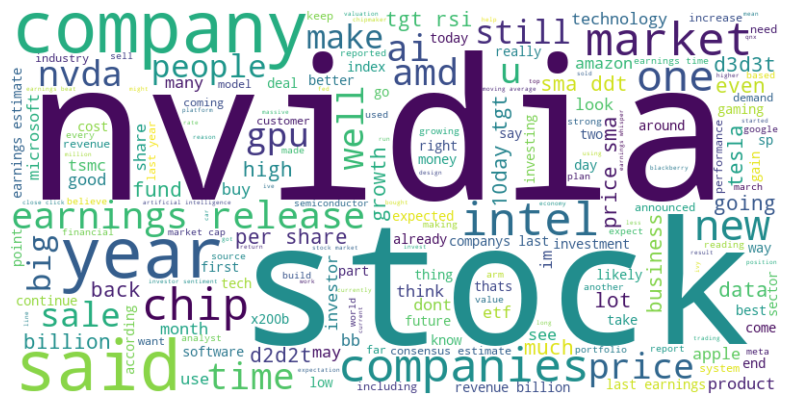

In [ ]:
all_text = ' '.join([' '.join(content) for content in df['내용']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

2.6 가장 많이 나온 단어에는 어떤 것들이 있는지 barplot을 그려 확인하세요.

전처리한 후 그래프

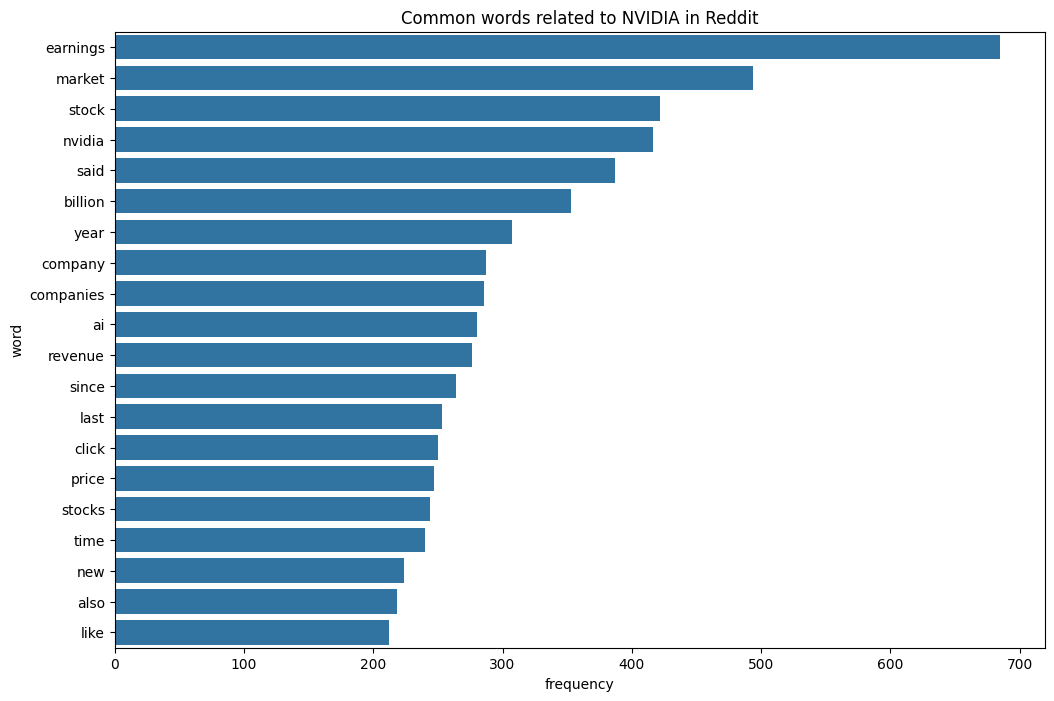

In [ ]:
# 단어 빈도 계산
word_counter = Counter(all_text.split())

# 상위 20개 단어 추출
most_common_words = word_counter.most_common(20)

common_words_df = pd.DataFrame(most_common_words, columns=['word', 'frequency'])

# barplot 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x='frequency', y='word', data=common_words_df)
plt.title('Common words related to NVIDIA in Reddit')
plt.show()

예시 코드 그래프

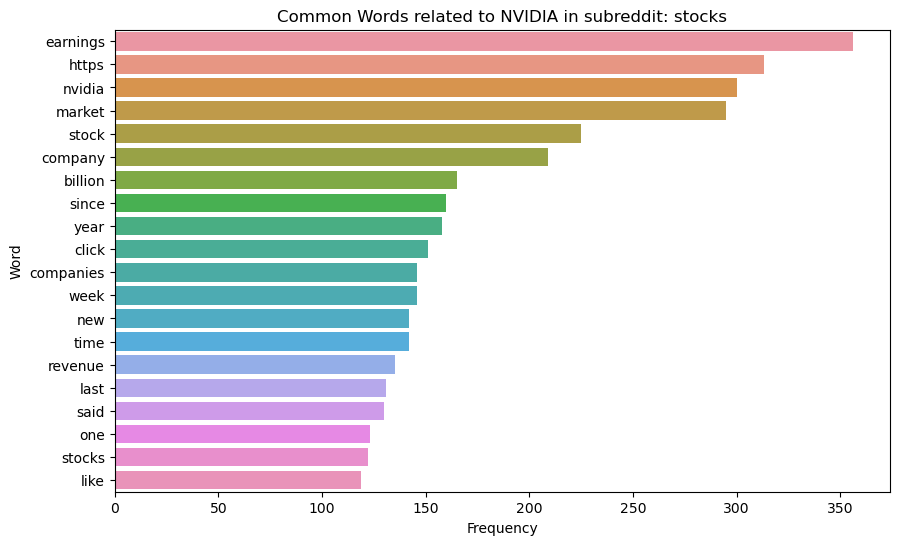

# **제출 시 API 인증 부분의 id, secret은 모두 지우고 제출해주세요!**

### 3. 자유 분석

위에서 진행한 분석만으로는 유의미한 인사이트를 도출하기는 어렵습니다. 추가적인 분석을 통해 해당 주식에 대한 평가가 긍정적인지, 또는 어떠한 이슈가 있는지 확인하는 것과 같은 추가적인 분석을 진행해주세요. 게시글이 아닌 리뷰를 가져오는 것도 가능합니다.

또한 본 분석에서 사용한 데이터가 아닌 다른 데이터를 활용하거나 또 다른 커뮤니티 혹은 사이트에서 API를 받아와 새로운 주제를 가지고 분석하는 것도 좋습니다:)

## 네이버 검색 API 서비스

네이버 웹문서 검색 API

In [4]:
import os
import sys
import urllib.request
import pandas as pd
import json
import re

# 네이버 API key
client_id = ""
client_secret = ""

query = urllib.parse.quote(input("검색 질의: "))
idx = 0
display = 100
start = 1
end = 1000

web_df = pd.DataFrame(columns=['Title', 'Link', 'Description'])

for start_index in range(start, end, display):

    url = "https://openapi.naver.com/v1/search/webkr?query=" + query \
    + "&display=" + str(display)\
    + "&start=" + str(start_index)

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        response_dict = json.loads(response_body.decode('utf-8'))
        items = response_dict['items']
        for item_index in range(0, len(items)):
            remove_tag = re.compile('<.*?>')
            title = re.sub(remove_tag, '', items[item_index]['title'])
            link = items[item_index]['link']
            description = re.sub(remove_tag, '', items[item_index]['description'])
            web_df.loc[idx] = [title, link, description]
            idx += 1

    else:
        print("Error Code:" + rescode)

web_df

검색 질의: 사랑의 하츄핑


,Title,Link,Description
0,사랑의 하츄핑 - 나무위키,https://namu.wiki/w/%EC%82%AC%EB%9E%91%EC%9D%9...,"캐치! 티니핑 시리즈 최초의 극장판인 애니메이션 영화로, 극장판 3부작 중 첫 작품..."
1,사랑의 하츄핑 - 위키백과 한국어,https://ko.wikipedia.org/wiki/%EC%82%AC%EB%9E%...,《 사랑의 하츄핑 》( 영어: Heartsping : Teenieping of Lo...
2,하츄핑 - 나무위키,https://namu.wiki/w/%ED%95%98%EC%B8%84%ED%95%91,"'사랑의 티니핑'. 늘 로미와 함께 다니며 애교 넘치는 로열핑으로, 사랑과 배려가 ..."
3,“'사랑의 하츄핑' 보러 갔는데...관크 부모들 때문에 망쳤습니다” | 위키트리,https://www.wikitree.co.kr/articles/977340,'캐치! 티니핑'의 첫 번째 영화인 '사랑의 하츄핑'이 70만 관객 돌파를 앞두고 ...
4,"[사랑의 하츄핑]&lt;영화상세 &lt; 영화 | 깊이 빠져 보다, CGV",http://www.cgv.co.kr/movies/detail-view/?midx=...,"‘로미’ 우연한 기회에 ‘하츄핑’을 처음 본 뒤, 운명의 인연임을 알아본다. '로미..."
...,...,...,...
145,"'사랑의 하츄핑' 로미와 하츄핑, 운명의 시작…'처음 본 순간' 예고편 공개",https://v.daum.net/v/20240624201410304,(엑스포츠뉴스 김유진 기자) '캐치! 티니핑'의 첫 번째 영화 '사랑의 하츄핑'(감...
146,배기성 | #사랑의하츄핑 #처음본순간 #캐치티니핑 #티니핑 #하츄핑 #Teeniep...,https://www.instagram.com/giseong_bae/p/C_imQY...,"1,835 likes, 79 comments - giseong_bae - Septe..."
147,사랑의 하츄핑 팝업스토어 송도 트리플 스트리트 아기 데이트 인천 가볼만한 곳 9월 까지,https://lovingyou.tistory.com/296,돌아기 가볼만한곳 인천 송도 트리플 스트리트 볼거리 데이트코스 사진찍기 예쁜곳 !!...
148,[잡담] 사랑의 하츄핑 OST 노래방에 나온거 알아? - 인스티즈(instiz) 연...,https://www.instiz.net/name_enter/92832733,77685 처음본순간(사랑의하츄핑OST) - 윈터(WINTER)이번에 코노가서 부른...
